In [1]:
from particle import Particle
import numpy as np
import matplotlib.pyplot as plt
from algorithms import PairWise, FMM
from forces import Inverse

In [2]:
N = 100
MAX_DEPTH = 3
G = 1
PRECISIONS = np.arange(1, 31, 2)
ITERS = 10

force = Inverse(G)

PW_algorithm = PairWise(force)
particles = [[Particle(charge=1/np.sqrt(N)) for _ in range(N)] for _ in range(ITERS)]

In [3]:
errors = []
errors_std = []

for precision in PRECISIONS:
    print(precision)
    temp_errors = []
    for i in range(ITERS):
        FMM_algorithm = FMM(MAX_DEPTH, precision, G)

        FMM_accelerations = FMM_algorithm.calculate_accelerations(particles[i])
        PW_accelerations = PW_algorithm.calculate_accelerations(particles[i])

        diff = FMM_accelerations - PW_accelerations
        error = np.mean(np.abs(diff))
        temp_errors.append(error)
    errors.append(np.mean(temp_errors))
    errors_std.append(np.std(temp_errors))

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29


In [4]:
regression = np.polyfit(PRECISIONS, np.log(errors), 1)
print(regression[0])

-0.965662417782041


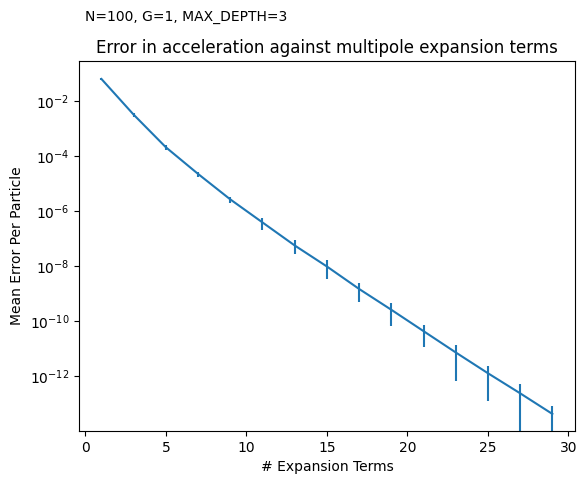

In [9]:
plt.errorbar(PRECISIONS, errors, errors_std)

plt.xlabel("# Expansion Terms")
plt.ylabel("Mean Error Per Particle")
plt.yscale("log")
plt.title("Error in acceleration against multipole expansion terms")
plt.text(0, 8, f"{N=}, {G=}, {MAX_DEPTH=}")
# plt.xscale("log")
plt.show()
# plt.savefig("figures/fmm_error.png", dpi=300)
